In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
dataset = pd.read_csv('hotel_bookings.csv')


In [2]:
a=dataset.isnull().sum()
a

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

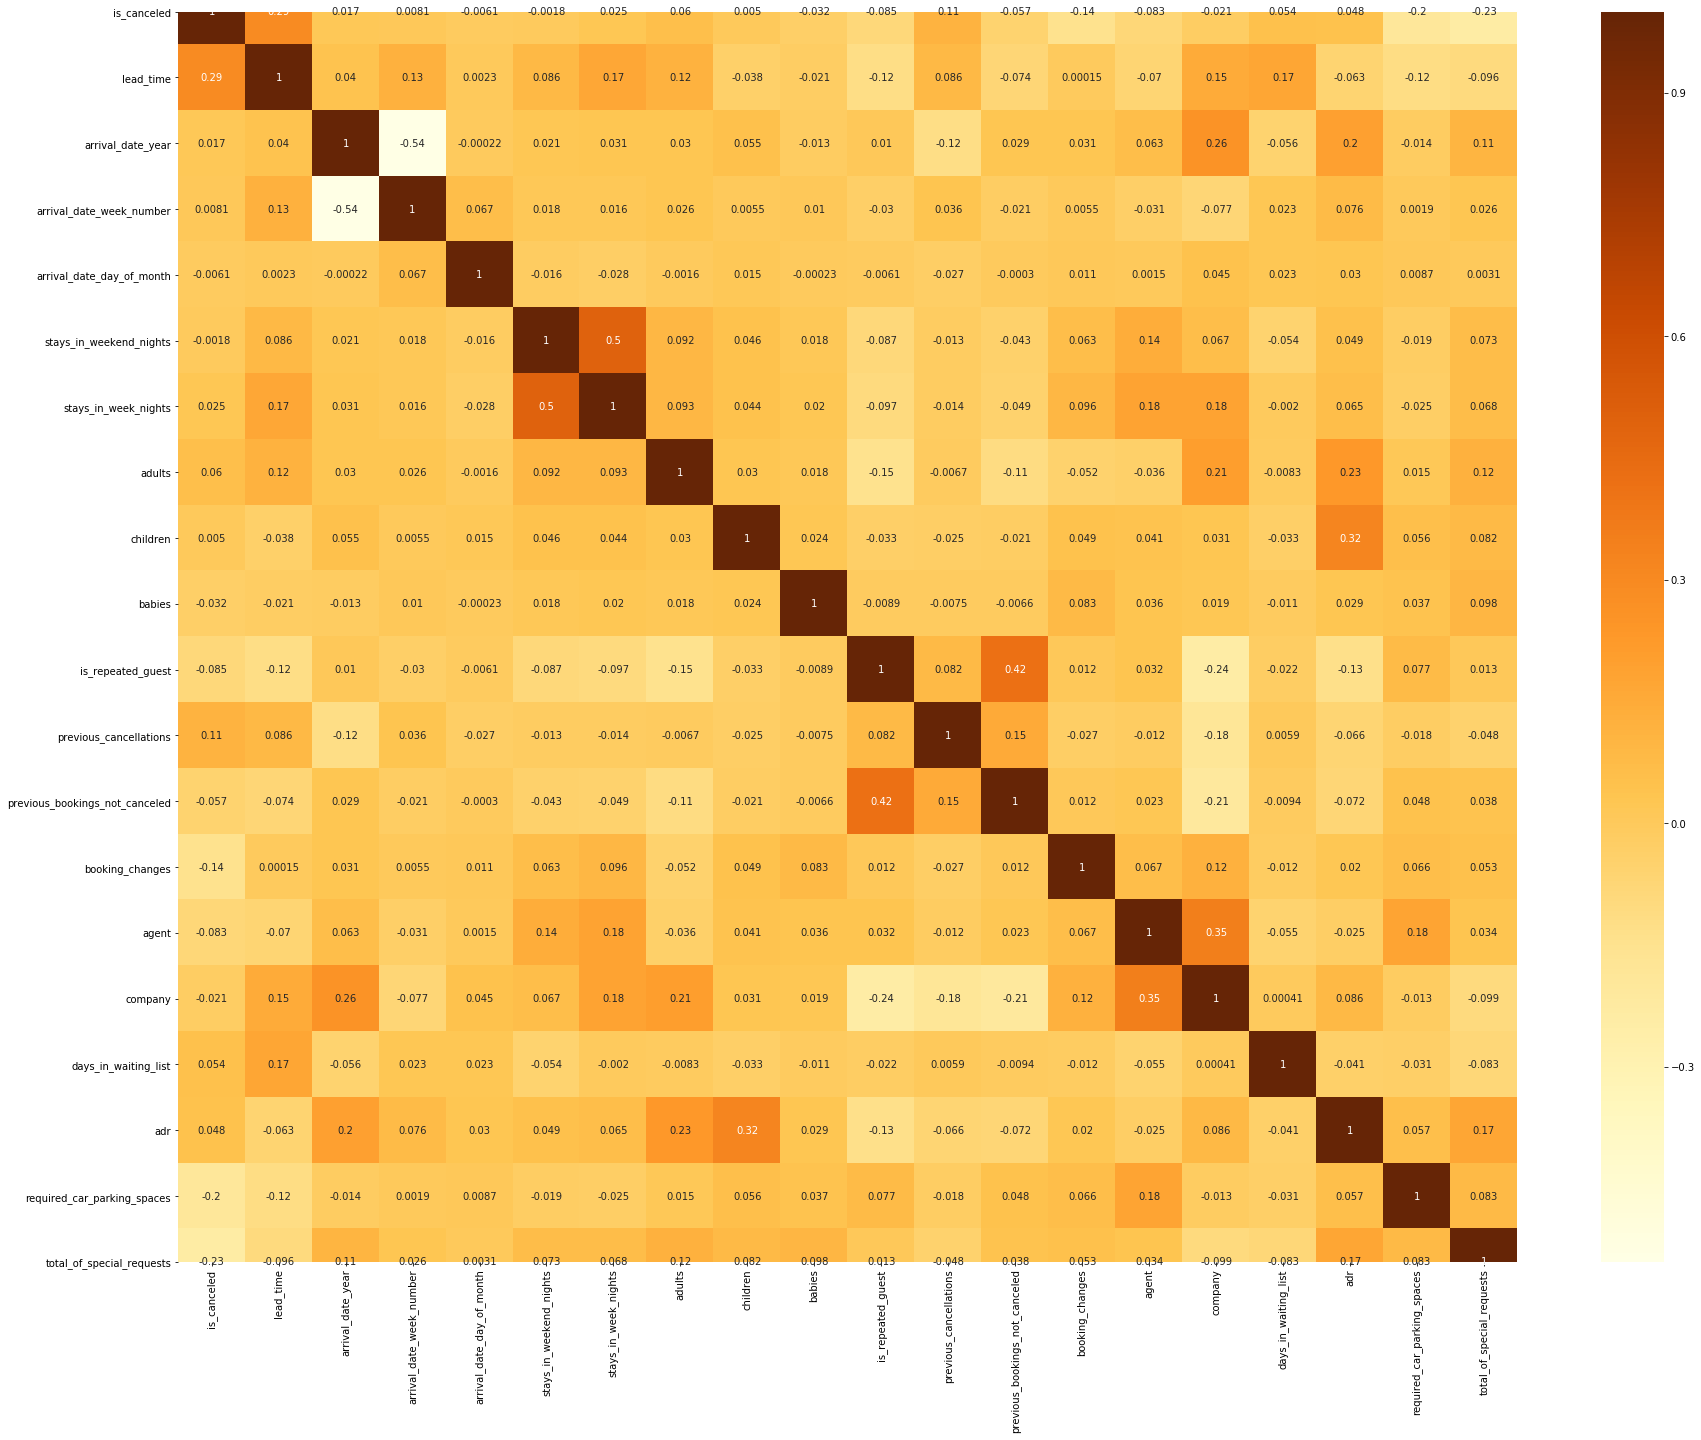

In [30]:
import seaborn as Sb
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,23))
g=Sb.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="YlOrBr")

In [31]:
dataset.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [18]:
dataset1 = dataset.drop(["country","agent","company","reservation_status",
                  "arrival_date_year","arrival_date_month","deposit_type","reservation_status_date","customer_type","market_segment","distribution_channel","meal","reserved_room_type","assigned_room_type"] , axis=1)

In [19]:
dataset["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [20]:
dataset["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05C46FB0>,
      dtype=object)

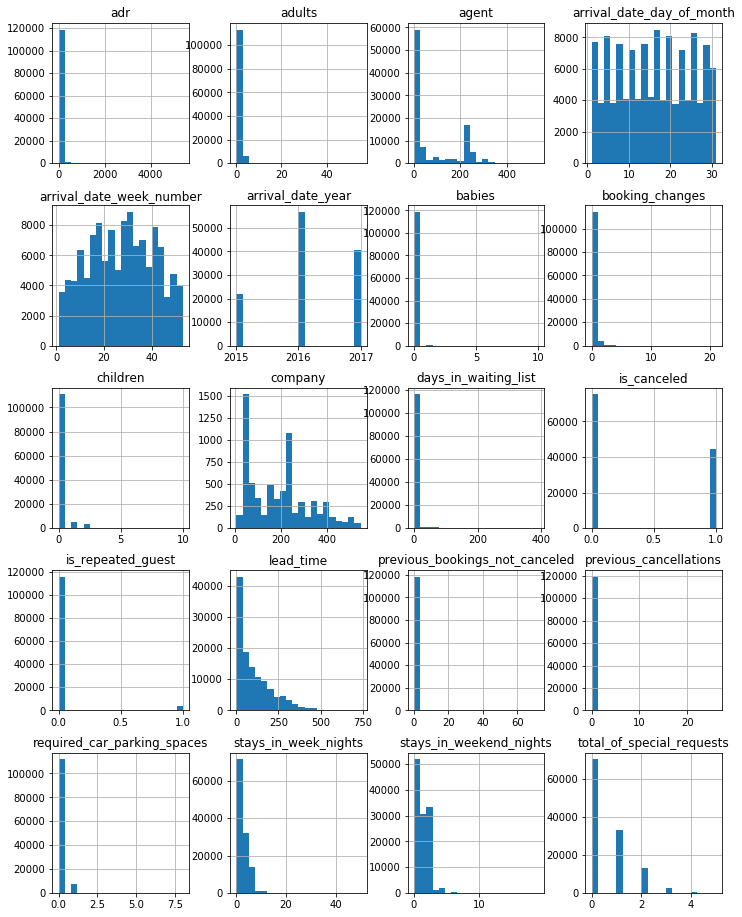

In [21]:
dataset.hist(bins = 20 , figsize= (12,16))

In [7]:
dataset1.head(10)

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0
1,Resort Hotel,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0
2,Resort Hotel,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
3,Resort Hotel,0,13,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
4,Resort Hotel,0,14,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1
5,Resort Hotel,0,14,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1
6,Resort Hotel,0,0,27,1,0,2,2,0.0,0,0,0,0,0,0,107.0,0,0
7,Resort Hotel,0,9,27,1,0,2,2,0.0,0,0,0,0,0,0,103.0,0,1
8,Resort Hotel,1,85,27,1,0,3,2,0.0,0,0,0,0,0,0,82.0,0,1
9,Resort Hotel,1,75,27,1,0,3,2,0.0,0,0,0,0,0,0,105.5,0,0


In [22]:
onehotvector_list =["hotel"]
one_hotencoding = pd.get_dummies(dataset1[onehotvector_list])
transf_df = pd.concat([one_hotencoding,dataset1],axis = 1)

In [23]:
transf_df

,hotel_City Hotel,hotel_Resort Hotel,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,1,Resort Hotel,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,0,1,Resort Hotel,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,0,1,Resort Hotel,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,0,1,Resort Hotel,0,13,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,0,1,Resort Hotel,0,14,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,City Hotel,0,23,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,1,0,City Hotel,0,102,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,1,0,City Hotel,0,34,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,1,0,City Hotel,0,109,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [24]:
transf_df.isnull().sum()

hotel_City Hotel                  0
hotel_Resort Hotel                0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [25]:
transf_df["children"].fillna( method ='ffill', inplace = True) 

In [26]:
transf_df.head(10)

,hotel_City Hotel,hotel_Resort Hotel,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,1,Resort Hotel,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0
1,0,1,Resort Hotel,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0
2,0,1,Resort Hotel,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
3,0,1,Resort Hotel,0,13,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
4,0,1,Resort Hotel,0,14,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1
5,0,1,Resort Hotel,0,14,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1
6,0,1,Resort Hotel,0,0,27,1,0,2,2,0.0,0,0,0,0,0,0,107.0,0,0
7,0,1,Resort Hotel,0,9,27,1,0,2,2,0.0,0,0,0,0,0,0,103.0,0,1
8,0,1,Resort Hotel,1,85,27,1,0,3,2,0.0,0,0,0,0,0,0,82.0,0,1
9,0,1,Resort Hotel,1,75,27,1,0,3,2,0.0,0,0,0,0,0,0,105.5,0,0


In [27]:
dataset1 = transf_df.drop(["hotel"] , axis=1)

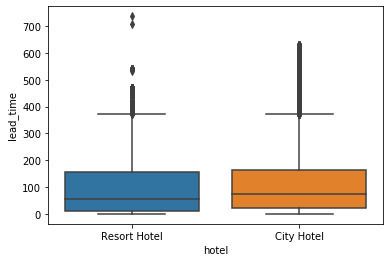

In [30]:
ax = Sb.boxplot(x="hotel", y="lead_time", data=dataset)

In [31]:
samp=dataset1.sample(n=50000)

In [32]:
samp

,hotel_City Hotel,hotel_Resort Hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
27049,0,1,0,18,33,13,2,3,2,2.0,0,0,0,0,0,0,310.20,0,0
32459,0,1,0,4,3,21,2,5,1,0.0,0,0,0,0,0,0,53.00,0,0
32094,0,1,0,57,1,7,4,6,2,0.0,0,0,0,0,2,0,43.80,0,2
40461,1,0,1,19,30,25,2,2,2,0.0,0,0,0,0,0,0,62.00,0,0
86648,1,0,0,55,15,6,0,1,2,0.0,0,0,0,0,0,0,104.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97194,1,0,0,97,37,8,2,3,2,0.0,0,0,0,0,0,0,112.60,0,0
68229,1,0,1,104,20,15,1,2,1,0.0,0,0,0,0,0,0,160.00,0,0
99150,1,0,0,77,41,7,1,2,2,0.0,0,0,0,0,0,0,132.30,0,3
117462,1,0,0,5,31,3,0,1,2,0.0,0,0,0,0,1,0,159.75,0,0


In [33]:
X1 = samp.drop(columns=["is_canceled"],axis = 1)    
Y1 = samp["is_canceled"]  

In [34]:
from sklearn.preprocessing import StandardScaler
dataset_sc = StandardScaler()
X1 = dataset_sc.fit_transform(X1)




In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
classifier.fit(X_test, y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
from sklearn import metrics
print('Accuracy Score:')
y_pred = classifier.predict(X_test)
y_pred
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.72496


In [38]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.77256


In [39]:
degree=[2,3,4,5]
acc_train=[]
acc_test=[]
for i in degree:
    svc=SVC(kernel='poly',degree=i,random_state=0)
    svc.fit(X_test,y_test)
    y_pred_test=svc.predict(X_test)
    svc.fit(X_train,y_train)
    y_pred_train=svc.predict(X_train)
    acc_test.append(metrics.accuracy_score(y_test,y_pred_test))
    acc_train.append(metrics.accuracy_score(y_train,y_pred_train))
    #print(metrics.accuracy_score(y_test,y_pred))
print('Accuracy Score:',acc_train,acc_test)

Accuracy Score: [0.7397866666666667, 0.76032, 0.7374666666666667, 0.73512] [0.71064, 0.74592, 0.72784, 0.72864]


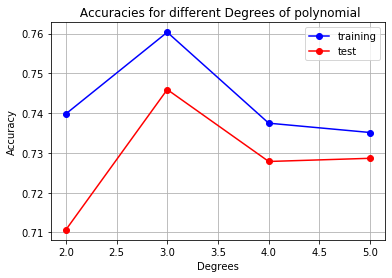

In [40]:
plt.plot(degree,acc_train,marker='o',markersize=6,color='blue',label='training')
plt.plot(degree,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Degrees of polynomial")
plt.xlabel("Degrees")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
classifier_1 = SVC(kernel = 'linear', random_state = 0)
classifier_1.fit(X_train, y_train)
classifier_2 = SVC(kernel = 'rbf', random_state = 0)
classifier_2.fit(X_train, y_train)
classifier_3 = SVC(kernel = 'poly', degree=3)
classifier_3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred_1 = classifier_1.predict(X_test)
y_pred_2 = classifier_2.predict(X_test)
y_pred_3 = classifier_3.predict(X_test)

In [43]:
acc_linear = accuracy_score(y_test , y_pred_1)
acc_rbf = accuracy_score(y_test , y_pred_2)
acc_poly = accuracy_score(y_test , y_pred_3)

In [44]:
from sklearn.model_selection import cross_val_score
svc=classifier_1 
scores_linear = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy') #cv is cross validation
print(scores_linear)
print('Scores mean',scores_linear.mean())

[0.716  0.7136 0.7168 0.712  0.732  0.7176 0.7152 0.7352 0.7296 0.7496]
Scores mean 0.72376


In [45]:
svc=classifier_3
scores_poly = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy') #cv is cross validation
print(scores_poly)
print('Scores mean',scores_poly.mean())

[0.72   0.7328 0.7272 0.7264 0.7344 0.732  0.7216 0.7296 0.7392 0.7488]
Scores mean 0.7312000000000001


In [46]:
svc=classifier_2
scores_rbf = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy') #cv is cross validation
print(scores_rbf)
print('Scores mean',scores_rbf.mean())

[0.7592 0.7752 0.7584 0.7528 0.764  0.748  0.7568 0.7712 0.7728 0.7776]
Scores mean 0.7636000000000001


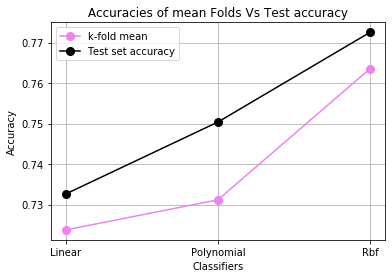

In [48]:
mean_acc = [scores_linear.mean(), scores_poly.mean(),scores_rbf.mean()]
test_acc = [acc_linear,acc_poly,acc_rbf]
range_svm = ['Linear','Polynomial','Rbf']
plt.plot(range_svm , mean_acc , marker ='o', markersize = 8 , color ='violet',label='k-fold mean')
plt.plot(range_svm , test_acc ,marker ='o', markersize = 8 , color ='black',label='Test set accuracy')
plt.title(" Accuracies of mean Folds Vs Test accuracy ")
plt.xlabel("Classifiers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier
depth = np.arange(5,25,1)
acc_train = []
acc_test = []
for i in depth:   
    DTClas = DecisionTreeClassifier(criterion= "entropy" ,max_depth= i,  random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

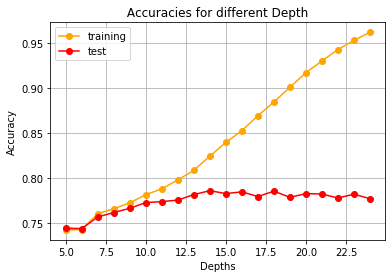

In [46]:
plt.plot(depth,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(depth,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Depth ")
plt.xlabel("Depths")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
depth = np.arange(5,25,1)
acc_train = []
acc_test = []
for i in depth:   
    DTClas = DecisionTreeClassifier(criterion= "entropy" ,max_depth= i, min_samples_leaf= 30,  random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

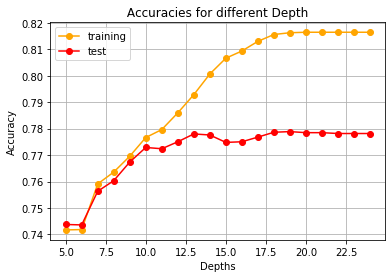

In [48]:
plt.plot(depth,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(depth,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Depth ")
plt.xlabel("Depths")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
depth = np.arange(5,15,1) #15
acc_train = []
acc_test = []
for i in depth:   
    DTClas = DecisionTreeClassifier(criterion= "entropy" ,max_depth= i,random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

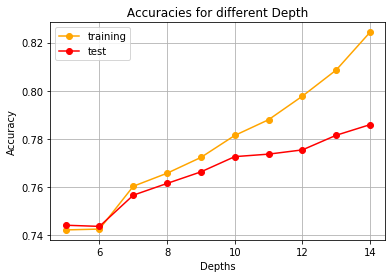

In [50]:
plt.plot(depth,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(depth,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Depth ")
plt.xlabel("Depths")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

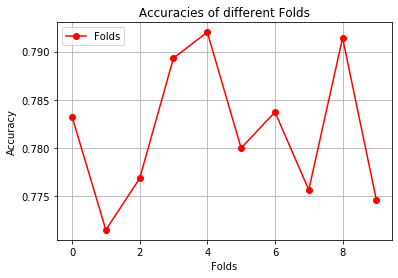

In [51]:
from sklearn.model_selection import cross_val_score
accuracies_dt_1 = cross_val_score(estimator = DTClas, X = X_train, y = y_train, cv = 10)
mean_acc_dt_1 = accuracies_dt_1.mean()

# Plotting the mean accuracies found from cross validtion and test set accuracy
plt.plot(np.arange(0,10,1),accuracies_dt_1,marker = 'o' , markersize = 6 , color = 'red',label='Folds')
plt.title(" Accuracies of different Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
DTClas_f = DecisionTreeClassifier(criterion= "entropy" ,max_depth= 15, min_samples_leaf= 30,  random_state= 0 )
DTClas_f.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

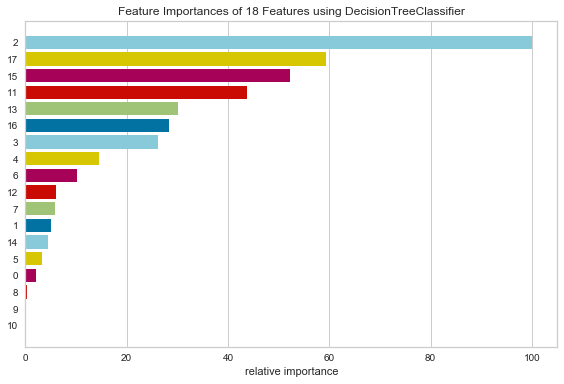

In [53]:
from yellowbrick.model_selection import FeatureImportances
DTClas_f = DecisionTreeClassifier(criterion= "entropy" ,max_depth= 15, min_samples_leaf= 30,  random_state= 0 )
DTClas_f.fit(X_train , y_train)
viz = FeatureImportances(DTClas_f)
viz.fit(X_train, y_train)
viz.show()

In [21]:
from xgboost import XGBClassifier
depth = np.arange(5,25,1)
acc_train = []
acc_test = []
for i in depth:   
    DTClas = XGBClassifier( max_depth= i ,  random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))



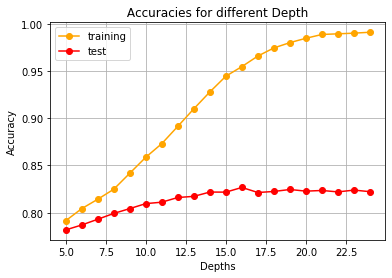

In [22]:
plt.plot(depth,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(depth,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Depth ")
plt.xlabel("Depths")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
from xgboost import XGBClassifier
depth = np.arange(3,21,1)
acc_train = []
acc_test = []
for i in depth:   
    DTClas = XGBClassifier( max_depth= i ,  random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

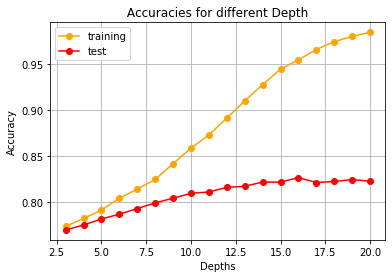

In [29]:
plt.plot(depth,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(depth,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Depth ")
plt.xlabel("Depths")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
boosting_level = np.arange(1,100,15)
acc_train = []
acc_test = []
for i in boosting_level:   
    DTClas = XGBClassifier( n_estimators = i, random_state= 0 )
    DTClas.fit(X_train, y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))




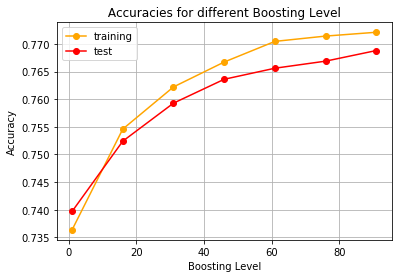

In [25]:
plt.plot(boosting_level,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(boosting_level,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Boosting Level ")
plt.xlabel("Boosting Level")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()  


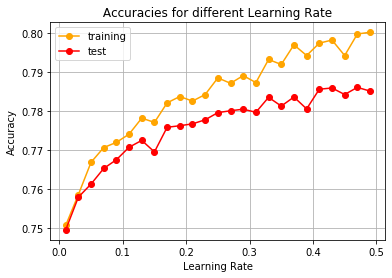

In [27]:
learning_rate = np.arange(0.01,0.5,0.02)
acc_train = []
acc_test = []
for i in learning_rate:   
    DTClas = XGBClassifier( learning_rate = i, random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

# Plotting learning rate versus the accuracies of train and test set
plt.plot(learning_rate,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(learning_rate,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Learning Rate ")
plt.xlabel("Learning Rate")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()